Compiling to C

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import csv

# Python

In [2]:
def update(lattice):
    box_length = len(lattice) - 2
    lattice_new = [[0 for _ in range(box_length + 2)] for _ in range(box_length + 2)]

    for i in range(1, box_length + 1):
        for j in range(1, box_length + 1):
            lattice_new[i][j] = update_rule(lattice, i, j)
    return lattice_new

def update_rule(lattice, i, j):
    n_neigh = lattice[i + 1][j] + lattice[i][j + 1] + lattice[i + 1][j + 1] + \
              lattice[i - 1][j] + lattice[i][j - 1] + lattice[i - 1][j - 1] + \
              lattice[i - 1][j + 1] + lattice[i + 1][j - 1]

    if (lattice[i][j] == 1) and (n_neigh in [2, 3]):
        return 1
    elif lattice[i][j] == 1:
        return 0
    elif (lattice[i][j] == 0) and (n_neigh == 3):
        return 1
    else:
        return 0


# Measuring execution time when box size is 3000
def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))


with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['python', timeit.timeit(main, number=1)])

32.938508432999996


# Cython

In [4]:
!pip install cython
%load_ext Cython

In [5]:
%%writefile setup.py
from setuptools import setup, Extension
from Cython.Build import cythonize
import os

# Specify the .pyx files
pyx_files = [
    "cython1.pyx",
    "cython2.pyx",
    "cython3.pyx",
    "cython4.pyx",
]

# generate extensions from the .pyx files
extensions = [Extension(os.path.splitext(file)[0], [file]) for file in pyx_files]

# Cythonize extensions with some additional compiler directives
setup(
    ext_modules=cythonize(
        extensions,
        compiler_directives={'language_level': "3", 'embedsignature': True}
    ),
)

Writing setup.py


In [6]:
!python setup.py build_ext --inplace

Compiling cython1.pyx because it changed.
Compiling cython2.pyx because it changed.
Compiling cython3.pyx because it changed.
Compiling cython4.pyx because it changed.
[1/4] Cythonizing cython1.pyx
[2/4] Cythonizing cython2.pyx
[3/4] Cythonizing cython3.pyx
[4/4] Cythonizing cython4.pyx
running build_ext
building 'cython1' extension
creating build
creating build/temp.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/include/python3.10 -c cython1.c -o build/temp.linux-x86_64-cpython-310/cython1.o
creating build/lib.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-310/cython1.o -L/usr/lib/x86_64-linux-gnu -o build/lib.linux-x86_64-cpython-310/cython1.cpython-310-x86_64-linux-gnu.so
building 'cython2' extension
x86_64-linux-gnu-gcc -W

## Cython 1

In [7]:
from cython1 import update as update_cython1

def run_simulation():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython1(lattice)
    return lattice

def record_time_to_csv(filename, method_name, execution_time):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([method_name, execution_time])

def main():
    # Measure the execution time
    execution_time = timeit.timeit(run_simulation, number=1)
    print(f"Execution time: {execution_time} seconds")

    # Record the execution time to CSV
    record_time_to_csv('time.csv', 'cython1', execution_time)

if __name__ == '__main__':
    main()

Execution time: 25.62308467600002 seconds


## Cython 2

In [8]:
from cython2 import update as update_cython2

def run_simulation():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython2(lattice)
    return lattice

def record_time_to_csv(filename, method_name, execution_time):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([method_name, execution_time])

def main():
    # Measure the execution time
    execution_time = timeit.timeit(run_simulation, number=1)
    print(f"Execution time: {execution_time} seconds")

    # Record the execution time to CSV
    record_time_to_csv('time.csv', 'cython2', execution_time)

if __name__ == '__main__':
    main()

Execution time: 6.395091680999997 seconds


## Cython 3

In [9]:
from cython3 import update as update_cython3

def run_simulation():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython3(lattice)
    return lattice

def record_time_to_csv(filename, method_name, execution_time):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([method_name, execution_time])

def main():
    # Measure the execution time
    execution_time = timeit.timeit(run_simulation, number=1)
    print(f"Execution time: {execution_time} seconds")

    # Record the execution time to CSV
    record_time_to_csv('time.csv', 'cython3', execution_time)

if __name__ == '__main__':
    main()

Execution time: 7.051647295999999 seconds


## Cython 4

In [10]:
from cython4 import update as update_cython4

def run_simulation():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython4(lattice)
    return lattice

def record_time_to_csv(filename, method_name, execution_time):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([method_name, execution_time])

def main():
    # Measure the execution time
    execution_time = timeit.timeit(run_simulation, number=1)
    print(f"Execution time: {execution_time} seconds")

    # Record the execution time to CSV
    record_time_to_csv('time.csv', 'cython4', execution_time)

if __name__ == '__main__':
    main()

Execution time: 5.070507716000009 seconds


# Plotting Results

In [11]:
df = pd.read_csv('time.csv')

In [12]:
# Prepending 'python' to the labels list
labels = ['python'] + df.iloc[:, 0].astype(str).tolist()

# Prepending the execution time for Python to the times list
times = [34.33653235] + df.iloc[:, 1].tolist()

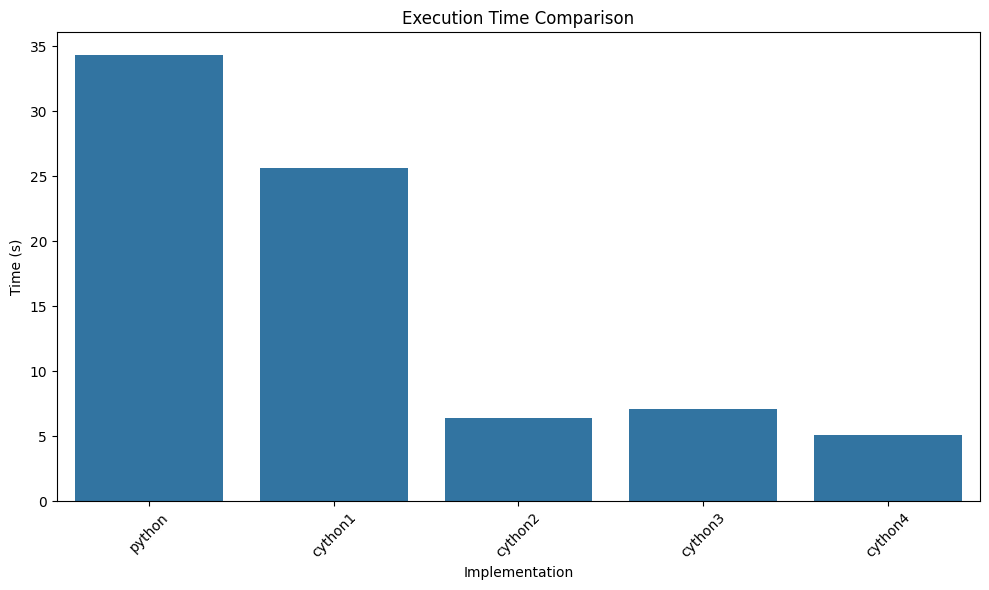

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=times)
plt.title('Execution Time Comparison')
plt.xlabel('Implementation')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()